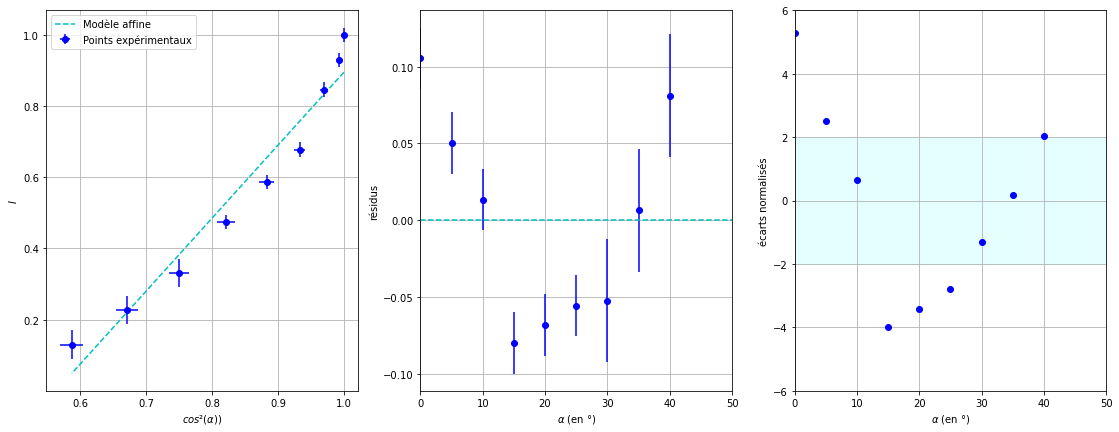

In [40]:
# Importation des bibliothèques utiles

import numpy as np # pour le traitement vectoriel des données
import numpy.random as rd # pour les tirages aléatoires
import matplotlib.pyplot as plt # pour les graphes

# Saisie des valeurs expérimentales
angle = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40]) # angles en degré
alpha=angle*np.pi/180
u_a = np.array([1,1,1,1,1,1,1,1,1])*np.pi/180 #incertitudes de lecture
u_m = np.array([1.83, 1.58, 1.31, 0.84, 0.63, 0.41, 0.20, 0.095, 0.031])# Valeur moyenne en volt
u=u_m/max(u_m)
u_v = np.array([0.02, 0.02, 0.02, 0.02, 0.02, 0.02,0.04,0.04,0.04]) # incertitudes-types sur les indices

# Ajustement pour la loi de Malus
p = np.polyfit((np.cos(alpha))**2, np.sqrt(u), 1)

# p est un tableau contenant les coefficients de l'ajustement : p[0] pente ; p[1] ordonnée à l'origine

# Calcul des résidus et des écarts normalisés
I_mod = p[0]*(np.cos(alpha)**2) + p[1]
# calcul des ordonnées des points "modèle"
residus = np.sqrt(u) - I_mod # calcul des résidus
En = residus/u_v # calcul des écarts normalisés

# Vérification graphique
plt.figure(figsize = (19,7))         # création d'une fenêtre graphique avec trois graphes

plt.subplot(1, 3, 1)                 # 1er graphe
# points expérimentaux avec barres d’erreur pour n
plt.errorbar((np.cos(alpha))**2, np.sqrt(u), yerr = u_v, xerr=2*np.sin(alpha)*np.cos(alpha)*u_a, fmt = 'bo',label = "Points expérimentaux")
# points issus de la régression linéaire
plt.plot((np.cos(alpha))**2, I_mod, 'c--',label = "Modèle affine")
plt.xlabel(r"$cos²(\alpha)$)")
plt.ylabel(r"$I$")
plt.grid(), plt.legend(loc = 'best')

plt.subplot(1, 3, 2)                 # 2ème graphe
# Affichage des résidus avec barres d'incertitude-type :
plt.errorbar(angle, residus, yerr = u_v, fmt = 'bo')
# Pour mieux visualiser la droite correspondant à un résidu nul :
plt.plot([0,50], [0, 0], 'c--')
plt.xlabel(r"$\alpha$ (en °)"), plt.xlim(0,50)
plt.ylabel(r"résidus")
plt.grid()

plt.subplot(1, 3, 3)                 # 3ème graphe [Celui qui est le plus en accord avec le programme]
# Affichage des écarts normalisés :
plt.plot(angle, En, 'bo')
# Pour mieux visualiser le domaine des En acceptables :
plt.fill_between([0,50], y1 = -2, y2 = 2, color = 'cyan', alpha = .1)
plt.xlabel(r"$\alpha$ (en °)"), plt.xlim(0,50)
plt.ylabel(r"écarts normalisés"), plt.ylim(-6,6)
plt.grid()
plt.show()